# Q3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from utilities import core 

In [2]:
from amalearn.reward import *
from amalearn.environment import *
from amalearn.agent import *

In [3]:
df = pd.read_csv("data/Q3.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   adidas 1          498 non-null    float64
 1   cost of adidas 1  498 non-null    float64
 2   adidas 2          498 non-null    float64
 3   cost of adidas 2  498 non-null    float64
 4   adidas 3          498 non-null    float64
 5   cost of adidas 3  498 non-null    float64
 6   Nike 1            498 non-null    float64
 7   cost of Nike 1    498 non-null    float64
 8   Nike 2            498 non-null    float64
 9   cost of Nike 2    498 non-null    float64
 10  Nike 3            498 non-null    float64
 11  cost of Nike 3    498 non-null    float64
dtypes: float64(12)
memory usage: 46.8 KB


In [4]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,adidas 1,cost of adidas 1,adidas 2,cost of adidas 2,adidas 3,cost of adidas 3,Nike 1,cost of Nike 1,Nike 2,cost of Nike 2,Nike 3,cost of Nike 3
0,8.698165,2.124302,73.007415,4.514878,40.866599,10.846865,24.415795,14.741241,2.282442,21.025128,60.799857,22.450390
1,7.736755,1.736224,71.518381,5.081607,42.494671,11.390847,26.139572,13.972725,3.524924,19.988319,61.576328,22.814902
2,8.234148,0.720888,73.497935,4.780550,42.127235,9.828231,24.395325,15.855539,3.154559,19.572899,60.722825,23.251942
3,8.072459,1.370655,71.995404,4.443790,43.158959,10.523129,25.123514,14.465492,3.530346,19.213771,61.257813,22.644400
4,7.975145,1.762138,71.398488,5.255535,42.143687,10.185065,25.102226,16.718474,3.307315,18.894294,60.478610,23.237258


In [5]:
cols = ["adidas 1", "adidas 2", "adidas 3", "Nike 1", "Nike 2", "Nike 3"]
values = {str(i) : 2 * df[cols[i]] - df["cost of " + cols[i]] for i in range(len(cols))}
arm_rewards = pd.DataFrame(values)
arm_rewards.head()

,0,1,2,3,4,5
0,15.272029,141.499952,70.886333,34.090350,-16.460244,99.149324
1,13.737286,137.955155,73.598495,38.306419,-12.938470,100.337754
2,15.747408,142.215320,74.426239,32.935112,-13.263781,98.193709
3,14.774263,139.547019,75.794790,35.781535,-12.153078,99.871226
4,14.188153,137.541441,74.102309,33.485977,-12.279664,97.719961


138.9716581196787

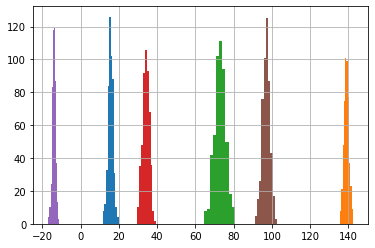

In [16]:
arm_rewards["0"].hist()
arm_rewards["1"].hist()
arm_rewards["2"].hist()
arm_rewards["3"].hist()
arm_rewards["4"].hist()
arm_rewards["5"].hist()
np.mean(arm_rewards["1"])

In [7]:
num_runs = 20                 
num_steps = 1000

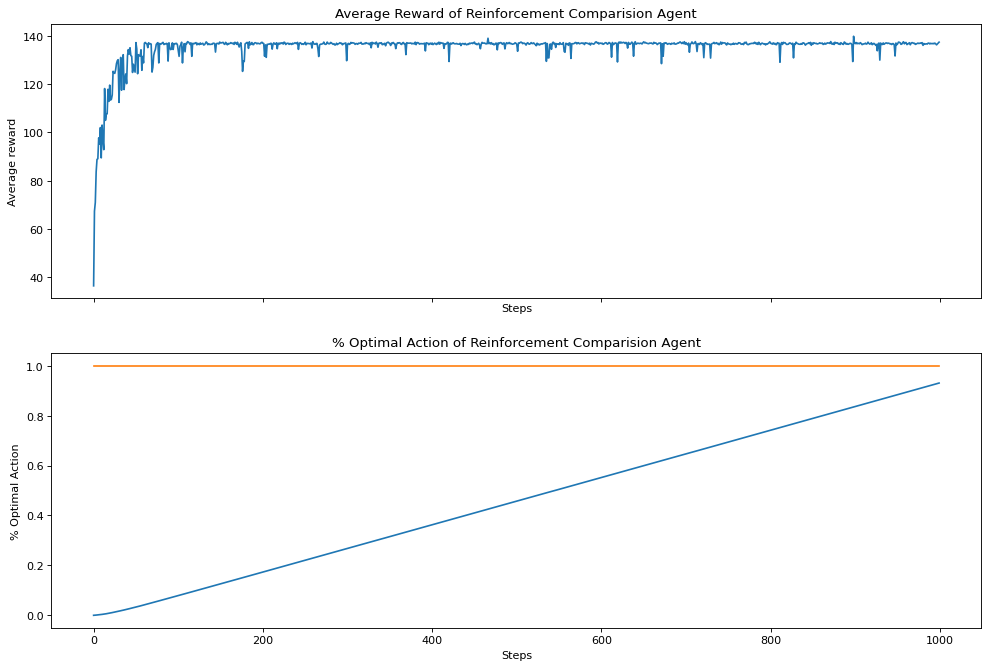

In [8]:
rewards = np.zeros((num_runs, num_steps))
optimal_action_count = np.zeros((num_runs, num_steps))

epsilon = 0
alpha = 0.9
beta = 0.1
# stepsize = 0.1
# stepsize_constant = False
agent_name = "Reinforcement Comparision"

for run in range(num_runs):
    np.random.seed(run)
    env = RecommenderEnvironment(arm_rewards, num_steps, '1')
    agent = ReinforcementComparisionAgent('1', env, epsilon, alpha=alpha, beta=beta)

    for i in range(num_steps):
        obs, r, d, info = agent.take_action()
        rewards[run, i] = r
        selected_action = info["action"]
        optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
        if selected_action == 1:
            optimal_action_count[run, i] += 1 

rc_avg_reward0 = np.mean(rewards, axis=0)
rc_optimal_action0 = np.mean(optimal_action_count, axis=0) / num_steps 

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
core.plot_optimal_action_percentage(axs[1], rc_optimal_action0, agent_name)
core.plot_average_reward(axs[0], rc_avg_reward0, agent_name)
axs[1].plot(np.ones(num_steps))
plt.show()

-16.4602444
34.0903498
38.306419399999996
99.14932400000001
70.8863326
32.9351118
100.3377536
15.272028800000001
98.1937088
99.871226
97.7199612
96.18927160000001
93.2000672
95.52773760000001
96.7983708
96.3659606
96.90912
98.091424
99.672665
93.87630680000001
97.3250582
141.49995199999998
95.1549176
137.9551554
35.7815352
-12.938470200000001
142.2153196
139.5470188
137.5414414
139.69710099999998
138.8977066
139.45498800000001
139.2169054
137.6914466
137.79332979999998
139.80571719999998
139.0348344
140.1984118
136.653591
137.76946260000003
138.7392676
33.4859772
138.9306414
138.10963619999998
97.0229316
137.57813000000002
138.451655
140.17512299999999
140.67361699999998
13.7372856
137.673145
138.1125326
138.5760334
139.5895446
139.94672740000001
140.9278366
139.334329
138.97186
140.017016
139.28981
137.04956019999997
139.6862544
138.98321919999998
139.6083832
138.27665580000001
137.8153552
138.5560596
139.3282826
139.5318124
140.05086659999998
140.1553716
137.4057392
138.9772552
137.6

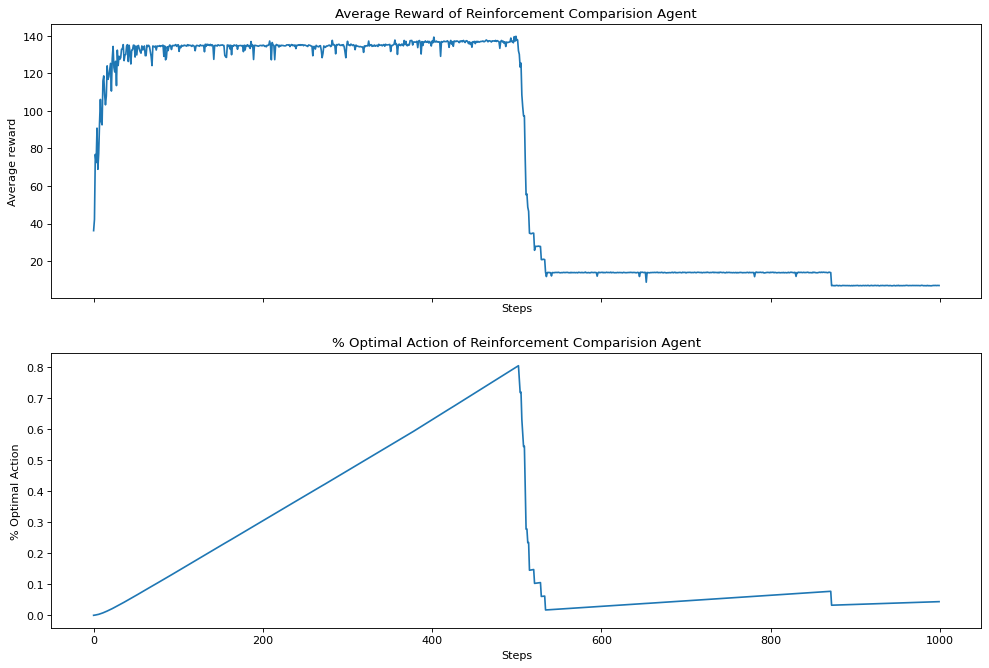

In [10]:
rewards = np.zeros((num_runs, num_steps))
optimal_action_count = np.zeros((num_runs, num_steps))

epsilon = 0
alpha = 0.9
beta = 0.1
# stepsize = 0.1
# stepsize_constant = False
agent_name = "Reinforcement Comparision"
n = np.zeros(num_runs)
for run in range(num_runs):
    np.random.seed(run)
    env = RecommenderEnvironment2(arm_rewards, num_steps, '1')
    agent = ReinforcementComparisionAgent('1', env, epsilon, alpha=alpha, beta=beta)

    for i in range(num_steps):
        n[run] += 1
        obs, r, d, info = agent.take_action()
        rewards[run, i] = r
        selected_action = info["action"]
        optimal_action_count[run, i] = optimal_action_count[run, max(i - 1, 0)]
        if selected_action == 1:
            optimal_action_count[run, i] += 1 
        if d:
            break

n = np.mean(n)
rc_avg_reward = np.mean(rewards, axis=0)
rc_optimal_action = np.mean(optimal_action_count, axis=0) / n 

fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
core.plot_optimal_action_percentage(axs[1], rc_optimal_action, agent_name)
core.plot_average_reward(axs[0], rc_avg_reward, agent_name)
plt.show()

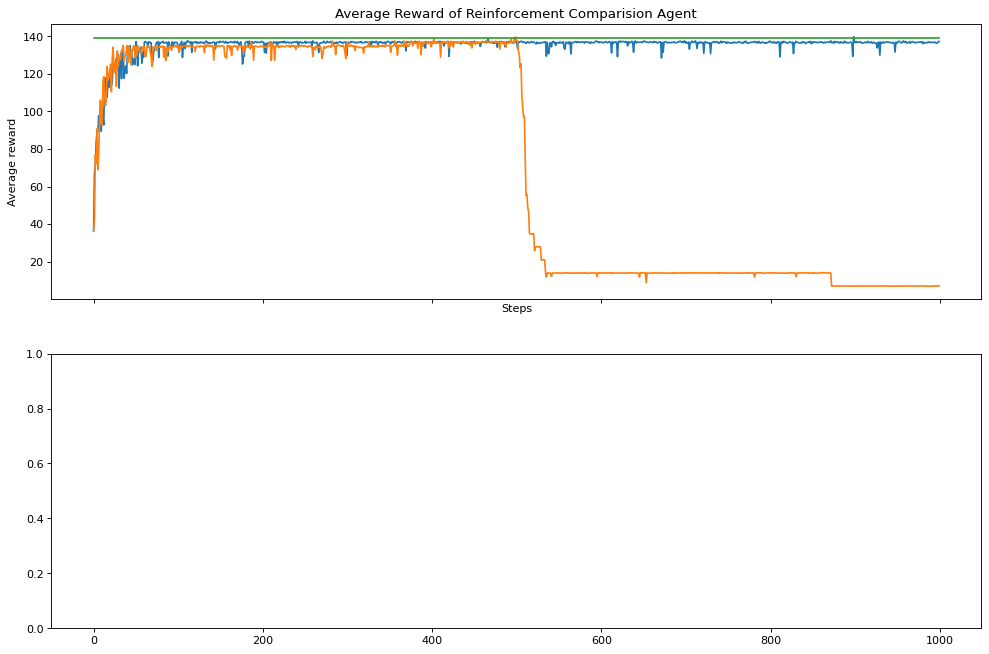

In [17]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(15, 10), dpi= 80, facecolor='w', edgecolor='k')
core.plot_average_reward(axs[0], rc_avg_reward0, agent_name)
core.plot_average_reward(axs[0], rc_avg_reward, agent_name)
axs[0].plot(np.ones(num_steps) * 138.97)